2.Using Movies dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
movies = pd.read_csv("G:/data sceince/Assignments/Association Rules/my_movies.csv")

In [3]:
movies.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [4]:
movies.shape

(10, 15)

In [8]:
movies_df = pd.get_dummies(movies)
movies_df

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
6,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
9,1,1,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,1,0


In [9]:
movies_df.shape

(10, 25)

#### Apriori algorithm
*To get the frequent item sets applying apriori algorithm

In [10]:
freq_itemsets = apriori(movies_df, min_support = 0.1, use_colnames = True)
freq_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
1392,0.1,"(Green Mile, LOTR1, V3_Harry Potter1, V2_LOTR1..."
1393,0.1,"(LOTR1, Green Mile, V3_Harry Potter1, V2_LOTR1..."
1394,0.1,"(Green Mile, V3_Harry Potter1, V2_LOTR1, V4_Gr..."
1395,0.1,"(Green Mile, LOTR1, V3_Harry Potter1, V2_LOTR1..."


In [11]:
# Building the association rules with 70 % confidence

In [13]:
rule1 = association_rules(freq_itemsets, metric = 'confidence', min_threshold = 0.7 )
rule1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
3,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
4,(V1_Sixth Sense),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
...,...,...,...,...,...,...,...,...,...
56755,"(V5_LOTR2, V1_Sixth Sense)","(Green Mile, LOTR1, V3_Harry Potter1, V2_LOTR1...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
56756,"(V5_LOTR2, Sixth Sense)","(Green Mile, LOTR1, V3_Harry Potter1, V2_LOTR1...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
56757,(V3_Harry Potter1),"(Green Mile, LOTR1, V2_LOTR1, V4_Green Mile, L...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
56758,(V2_LOTR1),"(Green Mile, LOTR1, V3_Harry Potter1, V4_Green...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


In [14]:
# Building the association rules for lift ratio

In [16]:
rule = association_rules(freq_itemsets, metric = 'lift', min_threshold = 0.7)
rule

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
4,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
...,...,...,...,...,...,...,...,...,...
64247,(LOTR2),"(Green Mile, LOTR1, V3_Harry Potter1, V2_LOTR1...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64248,(Harry Potter1),"(Green Mile, LOTR1, V3_Harry Potter1, V2_LOTR1...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64249,(V5_LOTR2),"(Green Mile, LOTR1, V3_Harry Potter1, V2_LOTR1...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64250,(V1_Sixth Sense),"(Green Mile, LOTR1, V3_Harry Potter1, V2_LOTR1...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


Inference: After considering support value = 0.1 we have got 64252 rules created. 

leverage: leverage value of 0 indicates independance between the antecedent and consequent. There should be dependence between the antecedent and the consequent

conviction: High conviction means consequent is highly dependant on antecedent

In [21]:
# Viewing first 20 rules having highest lift ratio

In [22]:
rule.sort_values('lift', ascending = False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
32126,"(Green Mile, V5_LOTR2, LOTR2, Harry Potter1)","(LOTR1, V3_Harry Potter1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
40483,"(V5_LOTR2, V1_Sixth Sense, V3_Harry Potter1)","(V4_Green Mile, Green Mile, Sixth Sense, Harry...",0.1,0.1,0.1,1.0,10.0,0.09,inf
40451,"(V4_Green Mile, V1_Sixth Sense, V3_Harry Potte...","(Green Mile, V5_LOTR2, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
40454,"(V1_Sixth Sense, V3_Harry Potter1, Sixth Sense...","(V4_Green Mile, Green Mile, V5_LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
40455,"(V5_LOTR2, V1_Sixth Sense, V3_Harry Potter1, S...","(V4_Green Mile, Green Mile, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
40456,"(V4_Green Mile, V5_LOTR2, V1_Sixth Sense, Harr...","(Green Mile, V3_Harry Potter1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
40457,"(V4_Green Mile, V5_LOTR2, Sixth Sense, Harry P...","(Green Mile, V1_Sixth Sense, V3_Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
40458,"(V4_Green Mile, V1_Sixth Sense, Sixth Sense, H...","(Green Mile, V5_LOTR2, V3_Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
40459,"(V4_Green Mile, V5_LOTR2, V1_Sixth Sense, Sixt...","(Green Mile, V3_Harry Potter1, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
40460,"(V5_LOTR2, V1_Sixth Sense, Sixth Sense, Harry ...","(V4_Green Mile, Green Mile, V3_Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [23]:
# Extracting the rules where lift ratio is greater than 1

In [24]:
rule[rule.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
6,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
7,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
10,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
64247,(LOTR2),"(Green Mile, LOTR1, V3_Harry Potter1, V2_LOTR1...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64248,(Harry Potter1),"(Green Mile, LOTR1, V3_Harry Potter1, V2_LOTR1...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64249,(V5_LOTR2),"(Green Mile, LOTR1, V3_Harry Potter1, V2_LOTR1...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64250,(V1_Sixth Sense),"(Green Mile, LOTR1, V3_Harry Potter1, V2_LOTR1...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


Inference : There are 64202 rules having lift ratio greater than 1

In [25]:
# Plotting the rules

In [26]:
# Plotting the rules

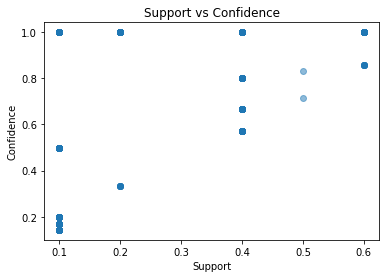

In [27]:
plt.scatter(rule.support, rule.confidence, alpha = 0.5)
plt.title("Support vs Confidence")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.show()

In [28]:
# Plot between support and lift

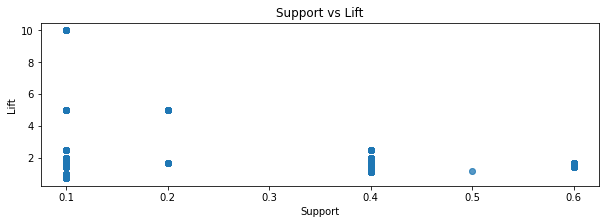

In [30]:
plt.figure(figsize = [10,3])
plt.scatter(rule.support, rule.lift, alpha = 0.5)
plt.title("Support vs Lift")
plt.xlabel("Support")
plt.ylabel("Lift")
plt.show()

In [31]:
# Plot between lift and confidence

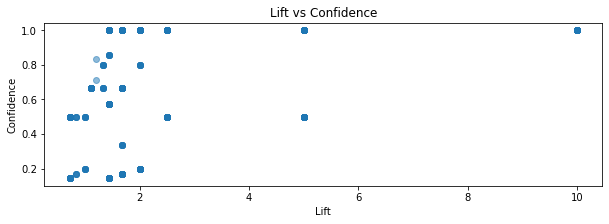

In [32]:
plt.figure(figsize = [10,3])
plt.scatter(rule.lift, rule.confidence, alpha = 0.5)
plt.title("Lift vs Confidence")
plt.xlabel("Lift")
plt.ylabel("Confidence")
plt.show()

In [33]:
# Creating freq sets with 0.2 support value

In [34]:
freq_sets = apriori(movies_df, min_support = 0.2, use_colnames = True)
freq_sets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
76,0.4,"(Gladiator, Patriot, V3_Sixth Sense, Sixth Sen..."
77,0.4,"(Gladiator, V1_Gladiator, V3_Sixth Sense, Sixt..."
78,0.4,"(Patriot, V1_Gladiator, V3_Sixth Sense, Sixth ..."
79,0.4,"(Gladiator, Patriot, V1_Gladiator, V3_Sixth Se..."


In [35]:
# creating rules for 60% confidence 

In [37]:
rules2 = association_rules(freq_sets, metric = 'confidence', min_threshold = 0.6)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
...,...,...,...,...,...,...,...,...,...
619,(Patriot),"(Gladiator, V1_Gladiator, V3_Sixth Sense, Sixt...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
620,(V1_Gladiator),"(Gladiator, Patriot, V3_Sixth Sense, Sixth Sen...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
621,(V3_Sixth Sense),"(Gladiator, Patriot, V1_Gladiator, Sixth Sense...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
622,(Sixth Sense),"(Gladiator, Patriot, V1_Gladiator, V3_Sixth Se...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8


Inference : 624 rules are created for 60% confidence

In [38]:
# creating rules for 60% confidence interval

In [40]:
rule_lift = association_rules(freq_sets, metric = 'lift', min_threshold = 0.6)
rule_lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
...,...,...,...,...,...,...,...,...,...
649,(Patriot),"(Gladiator, V1_Gladiator, V3_Sixth Sense, Sixt...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
650,(V1_Gladiator),"(Gladiator, Patriot, V3_Sixth Sense, Sixth Sen...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
651,(V3_Sixth Sense),"(Gladiator, Patriot, V1_Gladiator, Sixth Sense...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
652,(Sixth Sense),"(Gladiator, Patriot, V1_Gladiator, V3_Sixth Se...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8


Inference : 654 rules are created after considering 0.6 min threshold for lift ratio

In [41]:
# Plotting the rules

In [42]:
# Plot of Support vs confidence

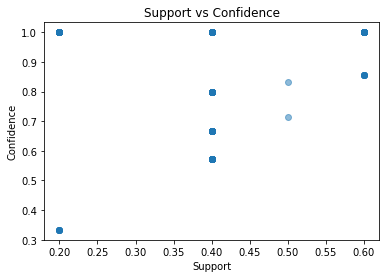

In [44]:
plt.scatter(rule_lift['support'],rule_lift['confidence'], alpha = 0.5)
plt.title("Support vs Confidence")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.show()

In [45]:
# Plot of support vs lift

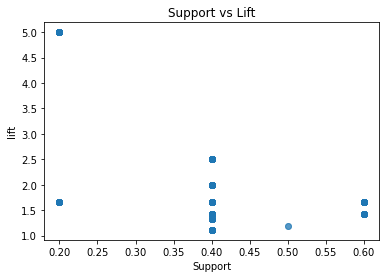

In [46]:
plt.scatter(rule_lift['support'],rule_lift['lift'], alpha = 0.5)
plt.title("Support vs Lift")
plt.xlabel("Support")
plt.ylabel("lift")
plt.show()

In [47]:
# Plot of lift vs confidence

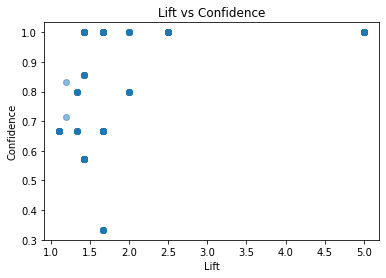

In [48]:
plt.scatter(rule_lift['lift'],rule_lift['confidence'], alpha = 0.5)
plt.title("Lift vs Confidence")
plt.xlabel("Lift")
plt.ylabel("Confidence")
plt.show()

In [55]:
# Creating sets for different support value 0.5

In [59]:
freq_set1 = apriori(movies_df, min_support = 0.5, use_colnames = True)
freq_set1

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.6,(V1_Gladiator)
4,0.6,(V2_Patriot)
5,0.5,"(Gladiator, Sixth Sense)"
6,0.6,"(Patriot, Gladiator)"
7,0.6,"(Gladiator, V1_Gladiator)"
8,0.6,"(Gladiator, V2_Patriot)"
9,0.6,"(Patriot, V1_Gladiator)"


In [60]:
freq_set1.shape

(17, 2)

In [51]:
# Creating rules for 65% confidence

In [63]:
rules3 = association_rules(freq_set1, metric = 'confidence', min_threshold = 0.65)
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
3,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
4,(Gladiator),(V1_Gladiator),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
5,(V1_Gladiator),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
6,(Gladiator),(V2_Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(V2_Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
8,(Patriot),(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
9,(V1_Gladiator),(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf


In [64]:
rules3.shape

(52, 9)

In [58]:
rules_lift1 = association_rules(freq_set1, metric = 'lift', min_threshold = 0.65)
rules_lift1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
3,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
4,(Gladiator),(V1_Gladiator),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
5,(V1_Gladiator),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
6,(Gladiator),(V2_Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(V2_Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
8,(Patriot),(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
9,(V1_Gladiator),(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf


In [65]:
rules_lift1.shape

(52, 9)

In [66]:
# Plotting the rules 

In [67]:
# Plot of Support vs Confidence

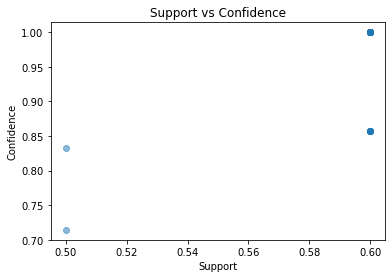

In [68]:
plt.scatter(rules_lift1['support'],rules_lift1['confidence'], alpha = 0.5)
plt.title("Support vs Confidence")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.show()

In [69]:
# Plot of Support vs Lift

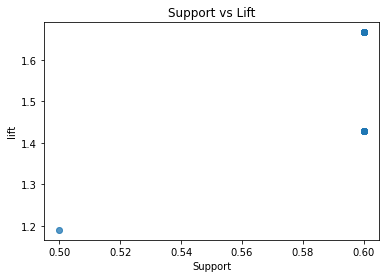

In [70]:
plt.scatter(rules_lift1['support'],rules_lift1['lift'], alpha = 0.5)
plt.title("Support vs Lift")
plt.xlabel("Support")
plt.ylabel("lift")
plt.show()

In [71]:
# Plot of Lift vs Confidence

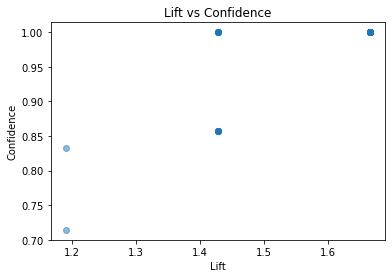

In [72]:
plt.scatter(rules_lift1['lift'],rules_lift1['confidence'], alpha = 0.5)
plt.title("Lift vs Confidence")
plt.xlabel("Lift")
plt.ylabel("Confidence")
plt.show()

In [74]:
rules_lift1.sort_values('lift', ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
26,"(Gladiator, V2_Patriot)",(V1_Gladiator),0.6,0.6,0.6,1.0,1.666667,0.24,inf
38,"(Patriot, Gladiator, V2_Patriot)",(V1_Gladiator),0.6,0.6,0.6,1.0,1.666667,0.24,inf
27,"(Gladiator, V1_Gladiator)",(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
30,(V2_Patriot),"(Gladiator, V1_Gladiator)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
31,(V1_Gladiator),"(Gladiator, V2_Patriot)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
32,"(Patriot, V2_Patriot)",(V1_Gladiator),0.6,0.6,0.6,1.0,1.666667,0.24,inf
33,"(Patriot, V1_Gladiator)",(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
34,"(V1_Gladiator, V2_Patriot)",(Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
35,(Patriot),"(V1_Gladiator, V2_Patriot)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
36,(V2_Patriot),"(Patriot, V1_Gladiator)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
